In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"]).set_index("date")

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df = df.drop(df[df["value"].quantile(0.025) > df["value"]].index)

In [5]:
df = df.drop(df[df["value"].quantile(0.975) < df["value"]].index)

In [6]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


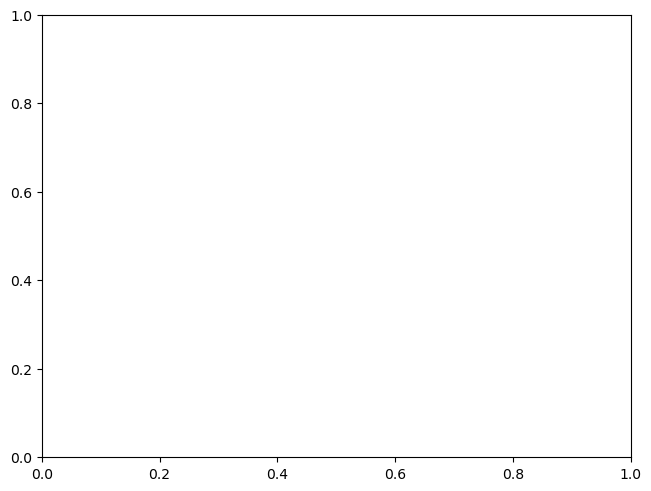

In [7]:
fig, ax = plt.subplots(layout="constrained")

In [8]:
import matplotlib.dates as mdates

In [9]:
#None of these really work
#locator = mdates.AutoDateLocator()
#formatter = mdates.ConciseDateFormatter(locator)
#ax.xaxis.set_major_locator(locator)
#ax.xaxis.set_major_formatter(formatter)

In [10]:
from matplotlib.dates import (MONTHLY, DateFormatter, RRuleLocator, rrulewrapper)

In [11]:
#These don't work either
#rule = rrulewrapper(MONTHLY, bymonthday=1, interval=6, count=8)
#loc = RRuleLocator(rule)
#formatter = DateFormatter('%y-%m')

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019.')

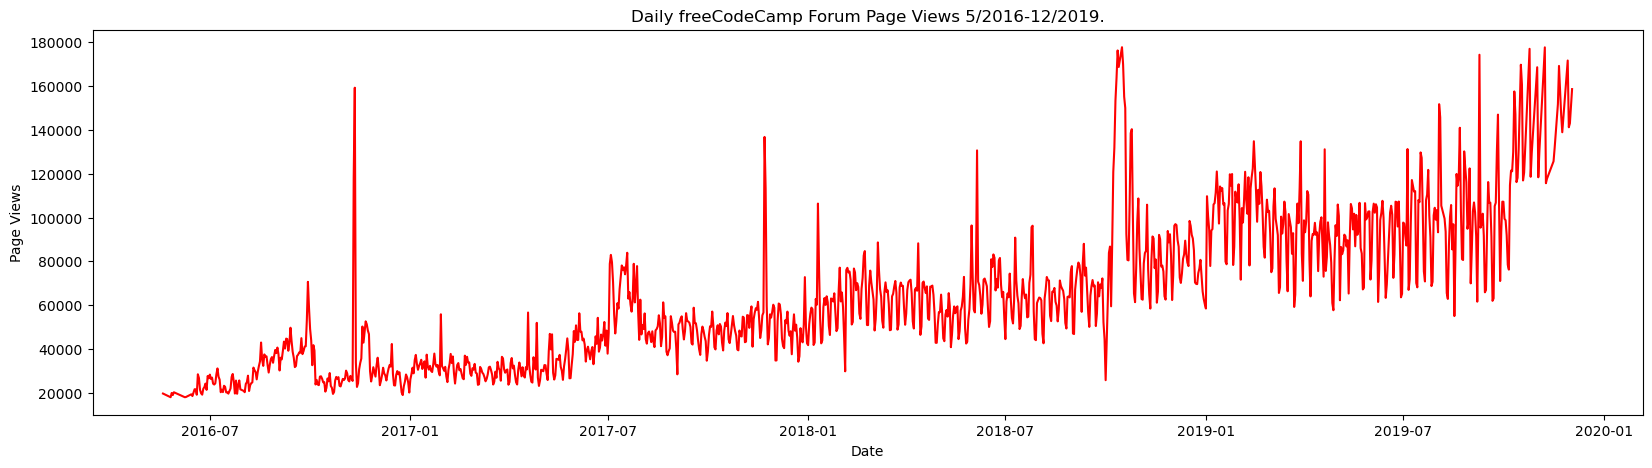

In [12]:
plt.figure(figsize = (20,5), dpi=100)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.plot(df, color="red")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")


In [6]:
df_bar = df.copy()

In [7]:
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [8]:
df_barbymonth = df_bar.resample("m").mean()

In [9]:
df_barbymonth.index

DatetimeIndex(['2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', freq='M')

In [30]:
months = ["January",  "February", "March","April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_barbymonth['months'] = pd.Categorical(df_barbymonth.index.strftime('%B'), categories=months, ordered=True)

dfp = pd.pivot_table(data=df_barbymonth, index=pd.DatetimeIndex(data=df_barbymonth.index).strftime("%Y"), columns='months', values='value')

In [31]:
dfp

months,January,February,March,April,May,June,July,August,September,October,November,December
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,113663.275862,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


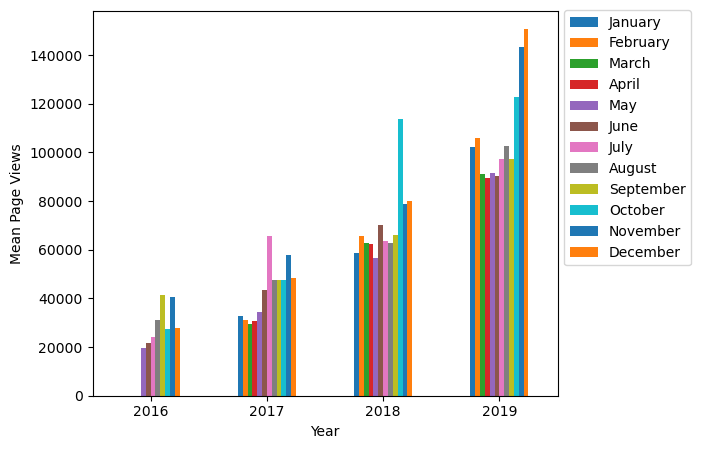

In [43]:
ax = dfp.plot(kind='bar', figsize=(6, 5), ylabel='Mean Page Views', xlabel='Year', rot=0)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc="upper left")

In [10]:
dfformatted = pd.DatetimeIndex(data=df_barbymonth.index).strftime("%Y-%B")

In [17]:
df_clean = df_barbymonth.set_index(dfformatted)

In [19]:
df_clean

,value
date,
2016-May,19432.400000
2016-June,21875.105263
2016-July,24109.678571
2016-August,31049.193548
2016-September,41476.866667
2016-October,27398.322581
2016-November,40448.633333
2016-December,27832.419355
2017-January,32785.161290


In [22]:
pd.pivot_table(df_clean)

ValueError: No group keys passed!

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019.')

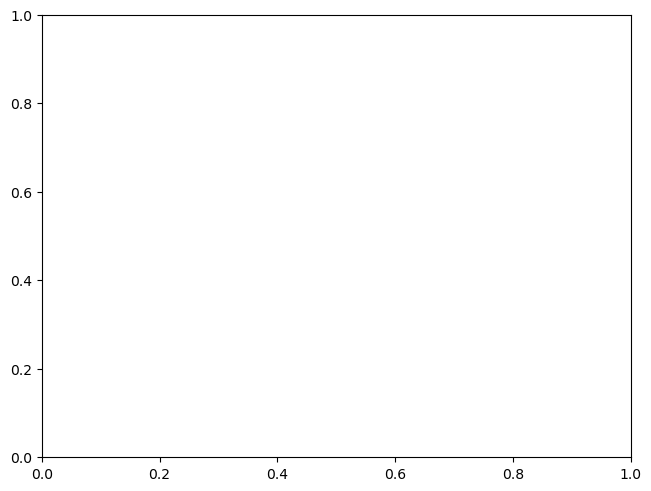

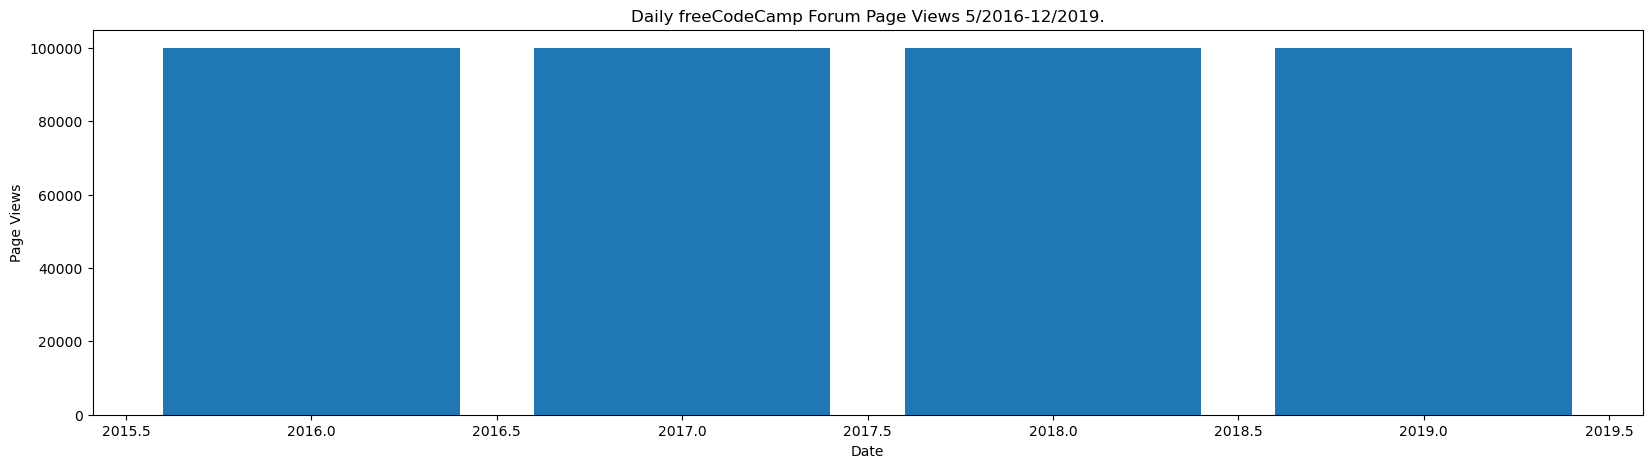

In [21]:
fig, ax = plt.subplots(layout="constrained")
plt.figure(figsize = (20,5), dpi=100)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.bar(x=[2016, 2017, 2018, 2019], height=99999,data=df_clean)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")